## Soft Actor-Critic (SAC)


## [Soft Actor-Critic (SAC) 알고리즘 개요]
* 연속 행동 공간 (Continuous Action Space) 문제를 가정
* Off-Policy Actor-Critic 계열
  * 메모리 활용한 비 실시간 학습
* 최대 엔트로피 강화 학습
  * 기대 보상을 최대화 하는 동시에 정책의 엔트로피를 최대화
  * 탐험 능력 향상 및 안정적인 학습을 기대



## [연속 행동 공간 문제]

* 이산 행동 공간 (Discrete Action Space) vs. 연속 행동 공간 (Continuous Action Space)
  * **이산 행동 공간**
    * 행동이 유한 개의 선택지로 구성
      * CartPole (막대를 왼쪽/오른쪽으로 움직이기)
      * Atari 게임 (조이스틱의 상/하/좌/우, 버튼 누르기 등)
    * 기존 Q-learning 개념으로 해결 가능
      * 어떤 상태에서든, 가능한 모든 행동에 대한 Q-value를 계산할 수 있기 때문

  * **연속 행동 공간**
    * 행동이 실수 값으로 표현되며, 가능한 행동의 범위가 연속적
      * **자동차 핸들 조작**: 핸들을 돌리는 각도 (-90도 ~ +90도)
      * **로봇 관절 제어**: 각 관절의 각도 (0도 ~ 360도)
      * **드론 프로펠러 속도 조절**: 각 프로펠러의 회전 속도 (0 RPM ~ 10000 RPM)
    *   가능한 모든 행동에 대한 Q-value를 계산하는 것이 불가능
    * **Q-learning 계열** 알고리즘을 **직접 적용하기 어려움**

* 연속 행동 공간에서의 Q-네트워크
  * **예시 상황**: 자율 주행 자동차가 차선을 유지하며 주행 중
    * **상태 (State)**: 현재 차선의 중앙으로부터 자동차의 위치, 자동차의 현재 속도, 전방 차량과의 거리 등
    * **행동 (Action)**: 핸들을 돌리는 각도 (-90도 ~ +90도)
  * Q-learing의 Q- 네트워크
    * 상태만 입력을 받은 후 모든 행동 경우의 수에 대해 계산을 해야 함
    * 예시 상황에서는, -90도, -89.9도, -89.8도, ..., 89.8도, 89.9도, 90도 등 무수히 많은 가능한 핸들 각도 중에서 어떤 것이 최적인지 판단할 수 없음
  * Q-네트워크가 **상태**와 **행동**을 **함께** 입력받는다면?
    * Q-네트워크는 아래와 같이 특정 상태-행동 쌍에 대한 Q-value를 평가할 수 있음
      * *현재 상태에서 핸들을 10도 돌렸을 때의 가치는 얼마인가?*
      * *현재 상태에서 핸들을 -5도 돌렸을 때의 가치는 얼마인가?*
* 연속 행동 공간에서의 정책 네트워크(Policy Network)
  * *A2C와 같이*, 상태를 입력받아 행동의 확률 분포를 출력
    * 이 확률 분포에서 행동(예: 11도)을 샘플링하고, Q-네트워크는 이 샘플링된 행동(11도)과 현재 상태를 함께 입력받아 Q-value를 계산

## [Soft Actor-Critic (SAC) 특징]


### 1. **Gaussian Policy**를 활용한 연속적인 행동 표현 및 샘플링
* SAC는 **Gaussian Policy(가우시안 정책)**를 사용하여 연속적인 행동을 표현하고 샘플링
  * $a \sim \mathbb{N}(\mu(s), \sigma(s)^2)$
    * $a$: 행동
    * $\mu(s)$: 상태 $s$에 대한 평균
    * $\sigma(s)$: 상태 $s$에 대한 표준편차
* Gaussian Policy는 행동을 평균과 표준편차로 나타내어 부드러운 행동 제어가 가능하게 함
* **예시**
  * 로봇 제어에서 모터의 토크를 정밀하게 제어
  * 자율 주행에서 핸들의 각도를 부드럽게 조정
* 이산적인 행동 공간에서는 불가능한 **미세한 조정**이 필요한 경우에 특히 유용함

### 2. 효율적인 **Off-policy** 학습
* Actor-Critic의 변형이지만, **Off-policy** 방식(DQN과 같은)으로 과거의 경험을 재사용, 학습 효율성을 높임
* 기존 알고리즘 대비 **샘플 효율성**이 높아, 연속적인 행동 공간에서 더 많은 데이터를 필요로 하는 문제를 해결하는 데 도움이 됨
  
  * **엔트로피 보상 (Entropy Regularization)**
    * **엔트로피 보상**을 통해 탐험(Exploration)과 활용(Exploitation)의 균형 강화
    * **높은 엔트로피**를 유지하도록 장려하여 다양한 행동을 시도하고, 최적 정책을 찾도록 유도
    * 연속적인 행동 공간에서는 탐험할 공간이 넓기 때문에, 엔트로피 보상의 효과가 극대화 됨
  
  * **온도 파라미터 $\alpha$ 자동 조정**
  * **학습 과정**에서 온도 파라미터를 자동 조정
    * 엔트로피 목표보다 엔트로피가 낮으면 알파를 증가시켜 탐험성을 높임
    * 높으면 알파를 감소시켜 활용도를 높임
  * **학습 효율성**을 극대화하며, 연속적인 행동 공간에서 **균형**을 맞추는 데 중요한 역할

### 3. Q값 과대평가 완화 - 두 개의 Q-네트워크
* SAC는 두 개의 Q-네트워크를 사용하여 정책 개선 단계에서 발생할 수 있는 Positive Bias를 완화
  * 두 Q-네트워크 결과 중 최소를 택해 Policy 네트워크를 업데이트할 때 사용(advantage 계산)

### 4. V-네트워크 - 상태 Q-value 예측
* 연속 행동 공간에서 행동의 경우의 수가 무한함
  * 상태($s$)의 Q-value 즉 $V(s)$를 계산하는 것은 불가능
* Policy 네트워크를 업데이트 하기 위한 advantage 계산에 $V(s)$가 필요
  * $A(s, a) = Q(s, a) - V(s)$
  * $V(s)$는 계산이 불가능하지만, 대신 이를 추정하는 네트워크를 학습해 advantage 계산에 활용

## [SAC 네트워크 구조]

### 1. Q-네트워크 (Q-Network)

* **상태**와 **행동**을 입력받아 해당 상태-행동 쌍의 Q값을 출력
  *   **입력**: 상태 ($s$)와 행동 ($a$)
  *   **은닉층**: ReLU 활성화 함수를 사용하는 여러 개의 은닉층
  *   **출력**: 해당 상태-행동 쌍의 Q값

\begin{array}{c}
\boxed{(State, Action)} \\
\downarrow \\
\boxed{\text{Input Layer}} \\
\downarrow \\
\boxed{\text{Hidden Layer}} \\
\downarrow \\
\boxed{\text{Output Layer}} \\
\downarrow \\
\boxed{Q}
\end{array}

* SAC는 안정적인 학습을 위해 두 개의 Q-네트워크 (q1, q2)를 사용

### 2. 타겟 Q-네트워크 (Target Q-Network)

* 타겟 Q-네트워크는 Q-네트워크와 동일한 구조 (target q1, target q2)
* 가중치가 주기적으로 업데이트됩니다 (soft update)
* 학습의 안정성을 높이는 역할

### 3. 정책 네트워크 (Policy Network)

* 정책 네트워크는 상태를 입력받아 행동의 확률 분포 (일반적으로 가우시안 분포의 평균과 표준편차)를 출력
  * **입력**: 상태 ($s$)
  * **은닉층**: ReLU 활성화 함수를 사용하는 여러 개의 은닉층
  * **출력**: 행동의 확률 분포를 나타내는 평균 ($\mu$)과 표준편차 ($\sigma$)
  
\begin{array}{c}
\boxed{State} \\
\downarrow \\
\boxed{\text{Input Layer}} \\
\downarrow \\
\boxed{\text{Hidden Layer}} \\
\downarrow \\
\boxed{\text{Output Layer}} \\
\downarrow \\
\boxed{(\text{Mean} \;\mu , \text{Std}\;\sigma)}
\end{array}

### 4. V-네트워크 (V-Network)

* **상태**를 입력받아 해당 상태의 Q값을 추정
  *   **입력**: 상태 ($s$)
  *   **은닉층**: ReLU 활성화 함수를 사용하는 여러 개의 은닉층
  *   **출력**: 해당 상태의 Q값 추정치

\begin{array}{c}
\boxed{(State)} \\
\downarrow \\
\boxed{\text{Input Layer}} \\
\downarrow \\
\boxed{\text{Hidden Layer}} \\
\downarrow \\
\boxed{\text{Output Layer}} \\
\downarrow \\
\boxed{Q}
\end{array}

## [loss 계산 및 update 과정]


### 1. 샘플링 (Sampling)

* **Replay Buffer에서 Mini-Batch 추출:**
$$(s_t, a_t, r_t, s_{t+1}, done_t) \sim \mathsf{D}$$
  * $s_t$: 시간 t에서의 상태 (state)
  * $a_t$: 시간 t에서의 행동 (action)
  * $r_t$: 시간 t에서의 보상 (reward)
  * $s_{t+1}$: 시간 t+1에서의 다음 상태 (next state)
  * $done_t$: 시간 t에서의 종료 여부 (boolean: 종료=1, 아니면=0)
  * $\mathsf{D}$: Replay buffer

### 2. Target V-value 계산
* **Target V-Network를 이용한 다음 상태의 가치 추정:**
$$\tilde{V}(s_{t+1}) = V_{\bar{\psi}}(s_{t+1})$$

    *   $V_{\bar{\psi}}$: Target V-network (파라미터: $\bar{\psi}$)



### 3. Target Q-value 계산
* **두 Q-Network를 이용한 다음 상태-행동 쌍의 Q-value 계산:**
$$\tilde{Q}_1(s_{t+1}, a_{t+1}) = Q_{\phi_1}(s_{t+1}, a_{t+1})$$
$$\tilde{Q}_2(s_{t+1}, a_{t+1}) = Q_{\phi_2}(s_{t+1}, a_{t+1})$$
  * $Q_{\phi_1}$, $Q_{\phi_2}$: 두 개의 Q-networks (파라미터: $\phi_1$, $\phi_2$)

* **Clipped Double Q-Learning (최소값 선택):**
  $$\tilde{Q}(s_{t+1}, a_{t+1}) = \min(\tilde{Q}_1(s_{t+1}, a_{t+1}), \tilde{Q}_2(s_{t+1}, a_{t+1}))$$

* **최종 Target Q-value 계산:**
$$\hat{Q}(s_t, a_t) = r_t + \gamma (1 - done_t) (\tilde{Q}(s_{t+1}, a_{t+1}) - \alpha \log \pi_\theta(a_{t+1} | s_{t+1}))$$
  * $\gamma$: 할인율 (discount factor)
  * $\alpha$: Entropy regularization coefficient (temperature parameter)

### 4. Q-networks Loss (Critic Loss)

* **각 Q-Network의 Mean Squared Error (MSE) Loss 계산:**
$$J_Q(\phi_i) = \mathbb{E}_{(s_t, a_t, r_t, s_{t+1}) \sim \mathsf{D}} \left[ \frac{1}{2} (Q_{\phi_i}(s_t, a_t) - \hat{Q}(s_t, a_t))^2 \right], \quad i = 1, 2$$

* **최종 Q-Loss (두 Loss의 합):**
$$J_Q(\phi) = J_Q(\phi_1) + J_Q(\phi_2)$$


### 5. V-network Loss (Critic Loss)

* **다음 상태에서 Policy Network를 이용해 행동 관련 값 계산:**
    $$\mu_{\theta}(s_{t+1}), \log \sigma_{\theta}(s_{t+1}) = \pi_\theta(s_{t+1})$$

  * $\pi_\theta$: Policy network (파라미터: $\theta$)
  * $\mu_{\theta}(s_{t+1})$: 다음 상태 $s_{t+1}$에서 policy network가 출력하는 평균 행동
  * $\log \sigma_{\theta}(s_{t+1})$: 다음 상태 $s_{t+1}$에서 policy network가 출력하는 행동의 로그 표준편차

* **다음 행동 샘플링:**
    $$a_{t+1} = f\tanh(z_{t+1})$$

  * $z_{t+1} \sim \mathsf{N}(\mu_{\theta}(s_{t+1}), \sigma_{\theta}(s_{t+1}))$: 정규 분포에서 샘플링된 값
  * $\tanh$: $\tanh$ 함수로 값을 -1 ~ 1 사이에 매치
    * 문제에 맞게 추후 scaling 필요할 수 있음

* **샘플링된 다음 행동의 Log Probability 계산**
  * source code를 이용해 개념 위주로 설명  
```python
dist = Normal(mean, std)
z = dist.rsample()
action = torch.tanh(z)
log_prob = (dist.log_prob(z) - torch.log(1 - action.pow(2) + 1e-7)).sum(axis=-1, keepdim=True)
```
    * `dist = Normal(mean, std)`  
      * $z \sim \mathsf{N}(\mu, \sigma^2)$
      * 평균(`mean`)이 $\mu$이고 표준편차(`std`)가 $\sigma$인 정규 분포(Normal distribution) 객체 `dist`를 생성
    * `z = dist.rsample()`
      * `dist` 분포에서 reparameterization trick을 사용하여 샘플 `z`를 생성
      * `rsample()` 메서드는 내부적으로 다음과 같이 작동
        * $z = \mu + \sigma \cdot \epsilon$,  where [$\epsilon \sim \mathsf{N}(0, 1)$]
    * `action = torch.tanh(z)`
      * $a = \tanh(z)$
      * 샘플링된 `z` 값에 hyperbolic tangent 함수(`tanh`)를 적용하여 `action`을 생성     
      * `tanh` 함수는 출력을 -1과 1 사이로 제한하는 역할
    * `z`에서 `action`으로 변환(`tanh` 적용)했으므로, 확률 밀도도 그에 맞게 조정해야함  
      * **`dist.log_prob(z)`:** `z`가 `dist` 분포에서 나올 로그 확률 밀도를 계산
        * (pytorch에서 제공)
      * **`torch.log(1 - action.pow(2) + 1e-7)`:** `tanh` 함수를 적용했기 때문에 발생하는 확률 밀도 변화를 보정하는 항
      * Change of variables 공식에 따르면, 다음과 같은 관계가 성립(증명은 생략)
        * $\log p(a) = \log p(z) - \log \left| \frac{da}{dz} \right|$
          * $p(a)$:  `action`의 확률 밀도
          * $\frac{da}{dz}$:  `action`을 `z`에 대해 미분한 값 (Jacobian)  
          $a = \tanh(z)$ 이므로, $\frac{da}{dz} = 1 - \tanh^2(z) = 1 - a^2$
        * $- \log \left| \frac{da}{dz} \right| = -\log(1 - a^2)$
          * 수치적 안정성을 위해(log(0)을 피하기 위해) 매우 작은 값($\epsilon \simeq 1e-7$)을 가산
        * $-\log(1 - a^2 + \epsilon)$
      * **`.sum(axis=-1, keepdim=True)`:** 다변량 정규 분포의 경우, 각 차원의 로그 확률을 더하여 전체 로그 확률을 계산
        * $\sum_{i} \left[ \log p(z_i) - \log(1 - a_i^2 + \epsilon) \right]$
  * $\therefore \log \sigma_\theta (a_t|s_t) = \sum_{i} \left[ \log p(z_i) - \log(1 - a_i^2 + \epsilon) \right]$

* **Q-value 계산:**
$$\tilde{Q}(s_{t}, a_{t})= \min(Q_{\phi_1}(s_t, a_t), Q_{\phi_2}(s_t, a_t))$$

* **Target V-value 계산:**
$$\hat{V}(s_t) = \tilde{Q}(s_{t}, a_{t}) - \alpha \log \sigma_\theta (a_t|s_t)$$

* **V-Network Loss(MSE) 계산:**
$$J_V(\psi) =  \mathbb{E}_{s_t \sim \mathsf{D}, a_t \sim \pi_\theta} \left[ \frac{1}{2} (V_\psi(s_t) - \hat{V}(s_t))^2 \right]$$
  * $V_\psi$: V-network (파라미터: $\psi$)

### 6. Policy Loss (Actor Loss)
* **샘플링된 행동의 Log Probability 계산:**
  * 앞서 계산한 값 활용

* **샘플링된 행동에 대한 Q-value 계산 (Clipped Double Q-Learning):**
  * 앞서 계산한 값 활용

* **Policy Loss 계산:**
$$J_\pi(\theta) = \mathbb{E}_{s_t \sim \mathsf{D}, \epsilon_t \sim \mathsf{N}} \left[ \alpha \log \sigma_\theta (a_t|s_t) - Adv \right]$$
$$ Adv = \tilde{Q}(s_{t}, a_{t}) -
V_\psi(s_t) $$
  * $Adv$: Advantage 추정값



### 7. Alpha Loss (Temperature Parameter Loss)
* **샘플링된 행동의 Log Probability 계산:**
  * 앞서 계산한 값 활용
* **Alpha Loss 계산:**
$$J(\alpha) = \mathbb{E}_{a_t \sim \pi_\theta} \left[ -\alpha \log \pi_\theta(a_t | s_t) - \alpha \bar{\mathsf{H}} \right]$$
  * $\bar{\mathsf{H}}$: 목표 엔트로피 (target entropy)

### 8. Network Update

1. **Q-networks 업데이트:**
  * $\phi_i \leftarrow \phi_i - \lambda_Q \hat{\nabla}_{\phi_i} J_Q(\phi_i)$ for $i = 1, 2$  ($\lambda_Q$: Q-network learning rate)

2. **V-network 업데이트:**
  * $\psi \leftarrow \psi - \lambda_V \hat{\nabla}_{\psi} J_V(\psi)$  ($\lambda_V$: V-network learning rate)

3. **(Delayed) Policy network 업데이트:**
  * $\theta \leftarrow \theta - \lambda_\pi \hat{\nabla}_{\theta} J_\pi(\theta)$  ($\lambda_\pi$: policy learning rate)
4. **Alpha 업데이트**
  * $\alpha \leftarrow \alpha - \lambda_{\alpha} \hat{\nabla}_{\alpha}J(\alpha)$ ($\lambda_\alpha$: alpha learning rate)

5. **Target V-network 업데이트:**
  * $\bar{\psi} \leftarrow \tau \psi + (1 - \tau) \bar{\psi}$

## [실습: Soft Actor-Critic (SAC)를 이용한 Pendulum 실습]
Reference: https://colab.research.google.com/github/MrSyee/pg-is-all-you-need/blob/master/05.SAC.ipynb



### 1. 라이브러리 가져오기 및 하이퍼파라미터 설정

In [ ]:
from typing import Dict, List, Tuple

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Normal
from IPython.display import clear_output

import imageio

# parameters
num_frames = 50000
plotting_interval = 500 # plot refresh 간격 (frames 단위)
memory_size = 100000
batch_size = 256
initial_random_steps = 10000
gamma = 0.99  # 할인율
lr_actor = 0.0003 # learning rate
lr_critic = 0.0003
lr_alpha = 0.0003
tau = 0.005 # target soft update rate 0: no-update 1: hard-update
policy_update_interval = 2
early_stop_threshold = -150 # pendulum-v1 대체로 -200 이상이면 성공으로 분류
early_stop_patience = 10
render_gif_path = "pendulum_simulation_sac.gif"

### 2. 신경망 모델 정의

* PolicyNetwork는 평균/표준편차를 이용해 action을 샘플링한 후 로그확률과 함께 출력
* QNetwork는 상태와 행동을 입력받아 Q-value를 출력
* Value는 상태를 입력받아 V-value를 출력

In [ ]:
def init_layer_uniform(layer: nn.Linear, init_w: float = 3e-3) -> nn.Linear:
    """Init uniform parameters on the single layer."""
    layer.weight.data.uniform_(-init_w, init_w)
    layer.bias.data.uniform_(-init_w, init_w)

    return layer


class PolicyNetwork(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_dim=256, log_std_min=-20, log_std_max=2):
        super(PolicyNetwork, self).__init__()
        self.log_std_min = log_std_min
        self.log_std_max = log_std_max

        self.linear1 = nn.Linear(state_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)

        self.log_std_linear = nn.Linear(hidden_dim, action_dim)
        self.log_std_linear = init_layer_uniform(self.log_std_linear)
        self.mean_linear = nn.Linear(hidden_dim, action_dim)
        self.mean_linear = init_layer_uniform(self.mean_linear)

    def forward(self, state):
        x = F.relu(self.linear1(state))
        x = F.relu(self.linear2(x))

        mean = self.mean_linear(x).tanh()
        log_std = self.log_std_linear(x).tanh()
        log_std = self.log_std_min + 0.5 * (self.log_std_max - self.log_std_min) * (log_std + 1)
        std = torch.exp(log_std)

        # sampling
        dist = Normal(mean, std)
        z = dist.rsample()
        action = z.tanh()

        # Enforce action bounds (for continuous action space) 1e-7: log(0)을 계산하는 상황을 막기 위함
        log_prob = (dist.log_prob(z) - torch.log(1 - action.pow(2) + 1e-7)).sum(axis=-1, keepdim=True)

        return action, log_prob


class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_dim=256):
        super(QNetwork, self).__init__()
        self.linear1 = nn.Linear(state_dim + action_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = nn.Linear(hidden_dim, 1)
        self.linear3 = init_layer_uniform(self.linear3)

    def forward(self, state, action):
        x = torch.cat((state, action), dim=-1)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)

        return x


class VNetwork(nn.Module):  # Optional: Target V-network
    def __init__(self, state_dim, hidden_dim=256):
        super(VNetwork, self).__init__()
        self.linear1 = nn.Linear(state_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = nn.Linear(hidden_dim, 1)
        self.linear3 = init_layer_uniform(self.linear3)

    def forward(self, state):
        x = F.relu(self.linear1(state))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)

        return x

### 3. Replay Buffer 클래스
* 에피소드의 경험을 메모리에 저장하는 기능 수행
* 메모리에서 배치 단위로 스텝 경험을 샘플링 하는 기능 수행

In [ ]:
class ReplayBuffer:
    """A simple numpy replay buffer."""

    def __init__(self, obs_dim: int, act_dim: int, size: int, batch_size: int = 32):
        """Initializate."""
        self.obs_buf = np.zeros([size, obs_dim], dtype=np.float32)
        self.next_obs_buf = np.zeros([size, obs_dim], dtype=np.float32)
        self.acts_buf = np.zeros([size, act_dim], dtype=np.float32)
        self.rews_buf = np.zeros([size], dtype=np.float32)
        self.done_buf = np.zeros([size], dtype=np.float32)
        self.max_size, self.batch_size = size, batch_size
        self.ptr, self.size = 0, 0

    def store(
        self,
        obs: np.ndarray,
        act: np.ndarray,
        rew: float,
        next_obs: np.ndarray,
        done: bool,
    ):
        """Store the transition in buffer."""
        self.obs_buf[self.ptr] = obs
        self.next_obs_buf[self.ptr] = next_obs
        self.acts_buf[self.ptr] = act
        self.rews_buf[self.ptr] = rew
        self.done_buf[self.ptr] = done
        self.ptr = (self.ptr + 1) % self.max_size
        self.size = min(self.size + 1, self.max_size)

    def sample_batch(self) -> Dict[str, np.ndarray]:
        """Randomly sample a batch of experiences from memory."""
        idxs = np.random.choice(self.size, size=self.batch_size, replace=False)
        return dict(
            obs=self.obs_buf[idxs],
            next_obs=self.next_obs_buf[idxs],
            acts=self.acts_buf[idxs],
            rews=self.rews_buf[idxs],
            done=self.done_buf[idxs],
        )

    def __len__(self) -> int:
        return self.size

### 3. SAC Agent 클래스

* SAC 알고리즘을 수행하는 에이전트 클래스를 정의
* Actor, Critic, Value 네트워크를 초기화
* `select_action` 함수는 주어진 상태에서 stochastic action을 선택
* `step` 함수는 주어진 행동을 이용해 환경에서 1 step 진행
* `update model` 함수는 각종 loss를 계산하고, alpha값과 Actor, Critic, Value 네트워크들을 업데이트
* `train` 함수는 정해진 횟수 동안 학습을 진행

In [ ]:
class SACAgent:
    """Simplified SAC agent interacting with environment."""
    def __init__(self, env: gym.Env, seed: int =777):
        """Initialize."""
        obs_dim = env.observation_space.shape[0]
        action_dim = env.action_space.shape[0]

        self.env = env
        self.memory = ReplayBuffer(obs_dim, action_dim, memory_size, batch_size)
        self.seed = seed

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(self.device)

        # Automatic entropy tuning
        self.target_entropy = -np.prod((action_dim,)).item()  # 정해진 규칙은 없으나, 널리 사용되는 방식
        self.log_alpha = torch.zeros(1, requires_grad=True, device=self.device)
        self.alpha_optim = optim.Adam([self.log_alpha], lr=lr_alpha)

        # Networks
        self.actor = PolicyNetwork(obs_dim, action_dim).to(self.device)
        self.v_net = VNetwork(obs_dim).to(self.device)
        self.target_v_net = VNetwork(obs_dim).to(self.device)
        self.target_v_net.load_state_dict(self.v_net.state_dict())
        self.q_net1 = QNetwork(obs_dim, action_dim).to(self.device)
        self.q_net2 = QNetwork(obs_dim, action_dim).to(self.device)

        # Optimizers
        self.actor_optim = optim.Adam(self.actor.parameters(), lr=lr_actor)
        self.v_optim = optim.Adam(self.v_net.parameters(), lr=lr_critic)
        self.q_optim1 = optim.Adam(self.q_net1.parameters(), lr=lr_critic)
        self.q_optim2 = optim.Adam(self.q_net2.parameters(), lr=lr_critic)

        # transition to store in memory
        self.transition = list()

        # total steps count
        self.total_step = 0

        # mode: train / test
        self.is_test = False


    def select_action(self, state: np.ndarray) -> np.ndarray:
        """Select an action from the input state."""
        if self.total_step < initial_random_steps and not self.is_test:
            selected_action = self.env.action_space.sample()
        else:
            act, _= self.actor(torch.FloatTensor(state).to(self.device))
            selected_action = act.detach().cpu().numpy()
        self.transition = [state, selected_action]

        return selected_action

    def step(self, action: np.ndarray) -> Tuple[np.ndarray, float, bool]:
        """Take an action and return the response of the env."""
        # network의 action 출력은 -1~1, pendulum의 action space는 -2~2 이므로 이를 scaling
        action_input = action * self.env.action_space.high
        next_state, reward, terminated, truncated, _ = self.env.step(action_input)
        done = terminated or truncated

        if not self.is_test:
            self.transition += [reward, next_state, done]
            self.memory.store(*self.transition)

        return next_state, reward, done


    def update_model(self) -> None:
        """Update the model by gradient descent."""
        samples = self.memory.sample_batch()
        state = torch.FloatTensor(samples["obs"]).to(self.device)
        next_state = torch.FloatTensor(samples["next_obs"]).to(self.device)
        action = torch.FloatTensor(samples["acts"]).to(self.device)
        reward = torch.FloatTensor(samples["rews"].reshape(-1, 1)).to(self.device)
        done = torch.FloatTensor(samples["done"].reshape(-1, 1)).to(self.device)

        new_action, log_prob = self.actor(state)

        # train alpha (dual problem)
        alpha_loss = (-self.log_alpha.exp() * (log_prob + self.target_entropy).detach()).mean()
        self.alpha_optim.zero_grad()
        alpha_loss.backward()
        self.alpha_optim.step()
        alpha = self.log_alpha.exp()  # used for the actor loss calculation

        # q_net loss
        mask = 1 - done
        q1 = self.q_net1(state, action)
        q2 = self.q_net2(state, action)
        target_v = self.target_v_net(next_state)
        target_q = reward + gamma * target_v * mask
        q_net1_loss = F.mse_loss(q1, target_q.detach())
        q_net2_loss = F.mse_loss(q2, target_q.detach())

        # v_net loss
        v = self.v_net(state)
        q = torch.min(self.q_net1(state, new_action), self.q_net2(state, new_action))
        target_v = q - alpha * log_prob
        v_loss = F.mse_loss(v, target_v.detach())

        if self.total_step % policy_update_interval == 0:
            # actor loss
            advantage = q - v.detach()
            actor_loss = (alpha * log_prob - advantage).mean()

            # actor update
            self.actor_optim.zero_grad()
            actor_loss.backward()
            self.actor_optim.step()

            # target_v_net update
            self._target_soft_update()
        else:
            actor_loss = torch.zeros(())

        # q_net update
        self.q_optim1.zero_grad()
        q_net1_loss.backward()
        self.q_optim1.step()

        self.q_optim2.zero_grad()
        q_net2_loss.backward()
        self.q_optim2.step()

        q_loss = q_net1_loss + q_net2_loss

        # v_net update
        self.v_optim.zero_grad()
        v_loss.backward()
        self.v_optim.step()


    def train(self, num_frames: int = num_frames, plotting_interval: int = 500):
        """Train the agent."""
        self.is_test = False

        state, _ = self.env.reset(seed=self.seed)
        scores = []
        score = 0

        for self.total_step in range(1, num_frames + 1):
            action = self.select_action(state)
            next_state, reward, done = self.step(action)

            state = next_state  # Update current state
            score += reward

            if done:
                state, _ = self.env.reset(seed=self.seed)
                scores.append(score)
                score = 0

            if len(self.memory) >= batch_size and self.total_step > initial_random_steps:
                self.update_model()

            if self.total_step % plotting_interval == 0:
                self._plot(self.total_step, scores)

            # Early stop condition
            if self.total_step > initial_random_steps:
              if np.min(scores[-early_stop_patience:]) >= early_stop_threshold:
                  print(f"Early stopping triggered! at Step: {self.total_step+1} Score: {score}")
                  break

        self.env.close()


    def _target_soft_update(self):
        """Soft-update target network."""
        for target_param, param in zip(self.target_v_net.parameters(), self.v_net.parameters()):
            target_param.data.copy_(tau * param.data + (1.0 - tau) * target_param.data)

    def _plot(self, frame_idx: int, scores: List[float],):
        """Plot the training progresses."""
        clear_output(wait=True)
        plt.figure(figsize=(4, 3))
        plt.title(f"Frame: {frame_idx}, Avg. Score: {np.mean(scores[-10:]):.2f}")
        plt.plot(scores)
        plt.show()


### 5. 학습 실행 및 결과 시각화

*   환경과 에이전트를 생성하고, 학습 루프 함수를 호출합니다.
*   학습 결과를 시각화합니다 (평균 reward 그래프).

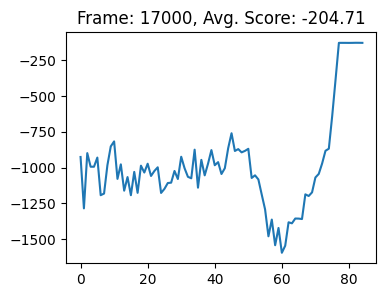

Early stopping triggered! at Step: 17401 Score: 0


In [ ]:
# environment
env = gym.make("Pendulum-v1", render_mode="rgb_array")

# 디버깅을 위해 seed 고정 (같은 seed일 때 같은 연산 유도)
seed = 777
np.random.seed(seed)
if torch.backends.cudnn.enabled:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

agent = SACAgent(env, seed)
agent.train(num_frames, plotting_interval)

### 6. 학습된 에이전트 검증 및 GIF 저장

*   학습된 에이전트를 검증합니다.
*   검증 에피소드를 GIF 파일로 저장합니다.
*   검증 에피소드의 총 보상을 출력합니다.
*   학습이 끝난 후, 이 부분만 별도로 실행합니다.

In [ ]:
state, _ = env.reset(seed = agent.seed)
done = False
score = 0
i = 0
frames = []

while not done:
    i = i + 1
    action = agent.select_action(state)
    next_state, reward, done = agent.step(action)
    state = next_state
    score += reward

    # 렌더링 이미지를 프레임 리스트에 추가
    frames.append(env.render())

# GIF 파일로 저장
imageio.mimsave(render_gif_path, frames, duration=33)  # fps 조절 가능 duration = 1000/fps
print(f"Test Episode Score: {score}")

env.close()

Test Episode Score: -127.97587843816552
